In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from src.visualize import LossVisualizer

from src.models.mlp import MLP

from src.utils import init_dataloader
from src.train import train
from src.valid import valid

from src.visualize import calc_grid_loss
from src.visualize import LossVisualizer

from src.utils import create_losses_func
from src.calc_delta import DeltaCalculator
from src.calc_delta_visualize import DeltaCalcVisualizer

import numpy as np

from torchvision import transforms

import torch
import torch.nn as nn

import matplotlib.pyplot as plt
myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 12,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

loader = init_dataloader(
    dataset_name='CIFAR10',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size = 64*(10000//64)
)

Files already downloaded and verified


In [4]:
model = MLP(
    layers_num=4,
    hidden=128,
    input_channels=3,
    input_sizes=(32, 32),
    classes=10,
    norm_class=nn.BatchNorm1d,
    dropout_p=0.05
).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 3e-4)
criterion = nn.CrossEntropyLoss()

model, losses = train(
    model,
    optimizer,
    criterion,
    loader,
    num_epochs=20,
    device=DEVICE
)

In [5]:
model

MLP(
  (layers): Sequential(
    (0): Sequential(
      (0): Linear(in_features=3072, out_features=128, bias=True)
      (1): ReLU()
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.05, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.05, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.05, inplace=False)
    )
    (3): Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.05, inplace=False)
    

In [6]:
#grid_step = 0.25
#direction_norm = 20
#losses_func = create_losses_func(loader, criterion)
#vis = LossVisualizer(grid_step=grid_step, direction_norm=direction_norm)
#vis.initialize_grid_loss(model, losses_func, )

In [7]:
d_vis = DeltaCalcVisualizer(model, loader, criterion, external_factor = 2.5)

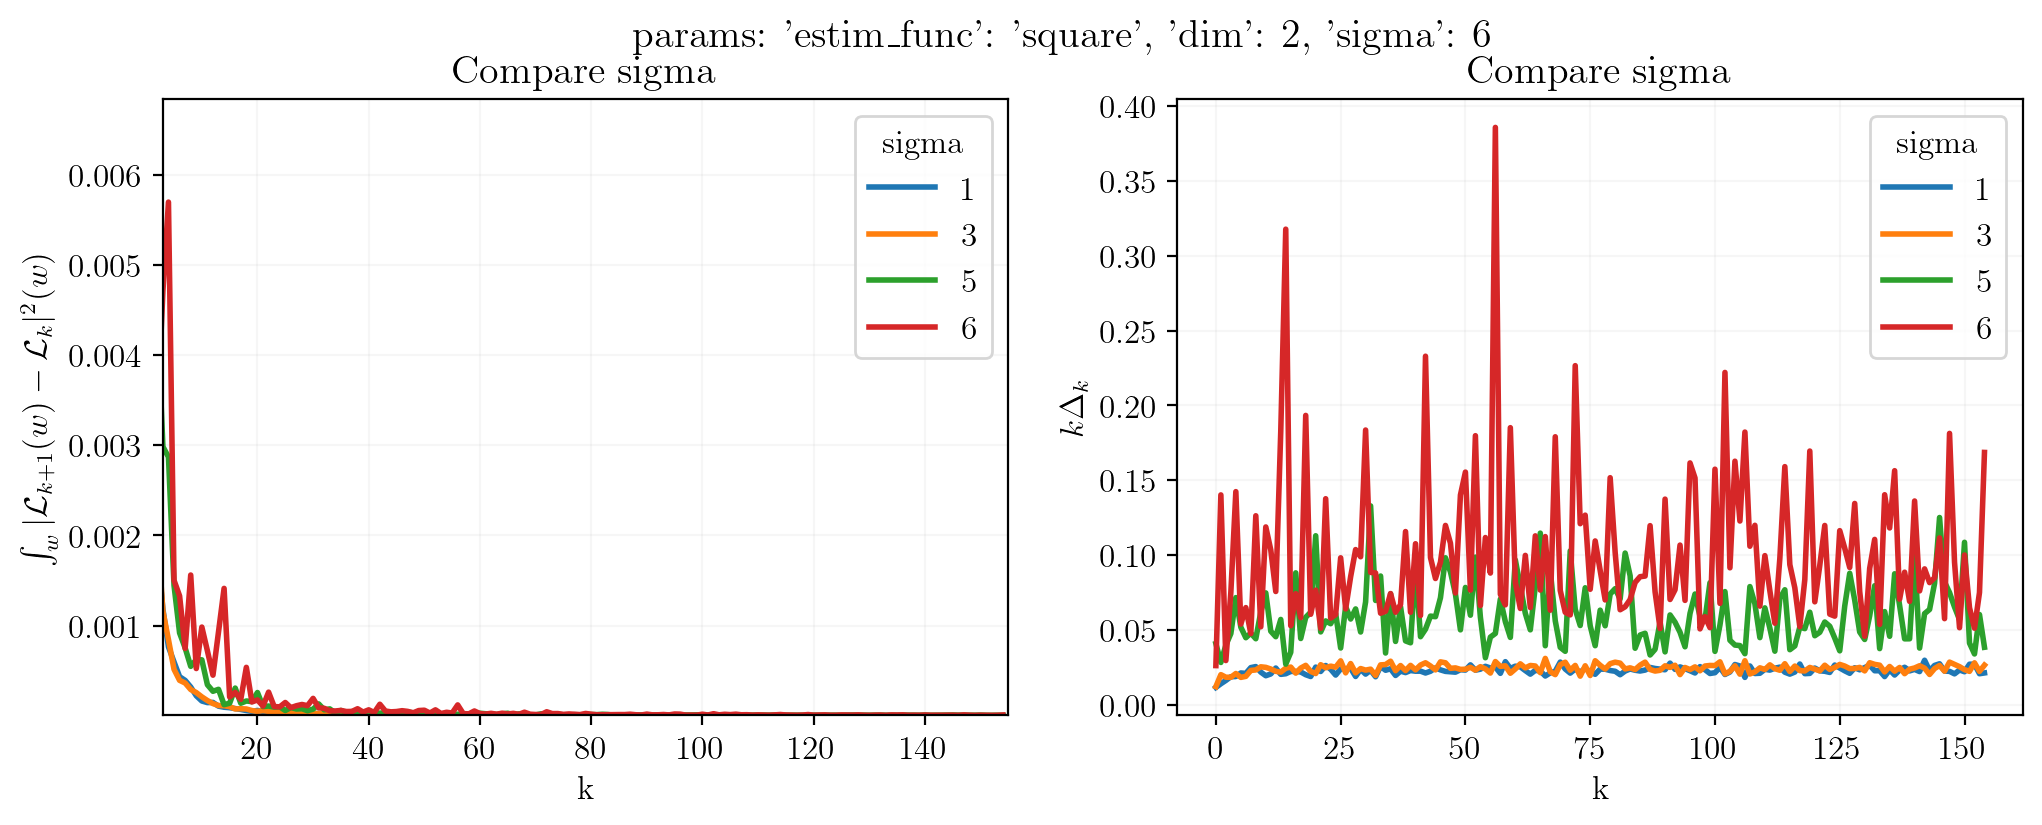

In [18]:
d_vis.compare_params(
    'random-subspace-proj',
    {'estim_func':'square', 'dim':2},
    'sigma',
    [1, 3, 5, 6],
    num_samples=256,
    begin=3
)

In [9]:
# d_vis.compare_params(
#     'random-subspace-proj',
#     {'estim_func':'abs', 'sigma':4, 'dim':128},
#     'sigma',
#     [1, 2, 4, 8],
#     num_samples=32,
#     begin=10
# )
# d_vis.compare_params(
#     'random-subspace-proj',
#     {'estim_func':'abs', 'sigma':4, 'dim':128},
#     'sigma',
#     [1, 2, 4, 8],
#     num_samples=32,
#     begin=10
# )

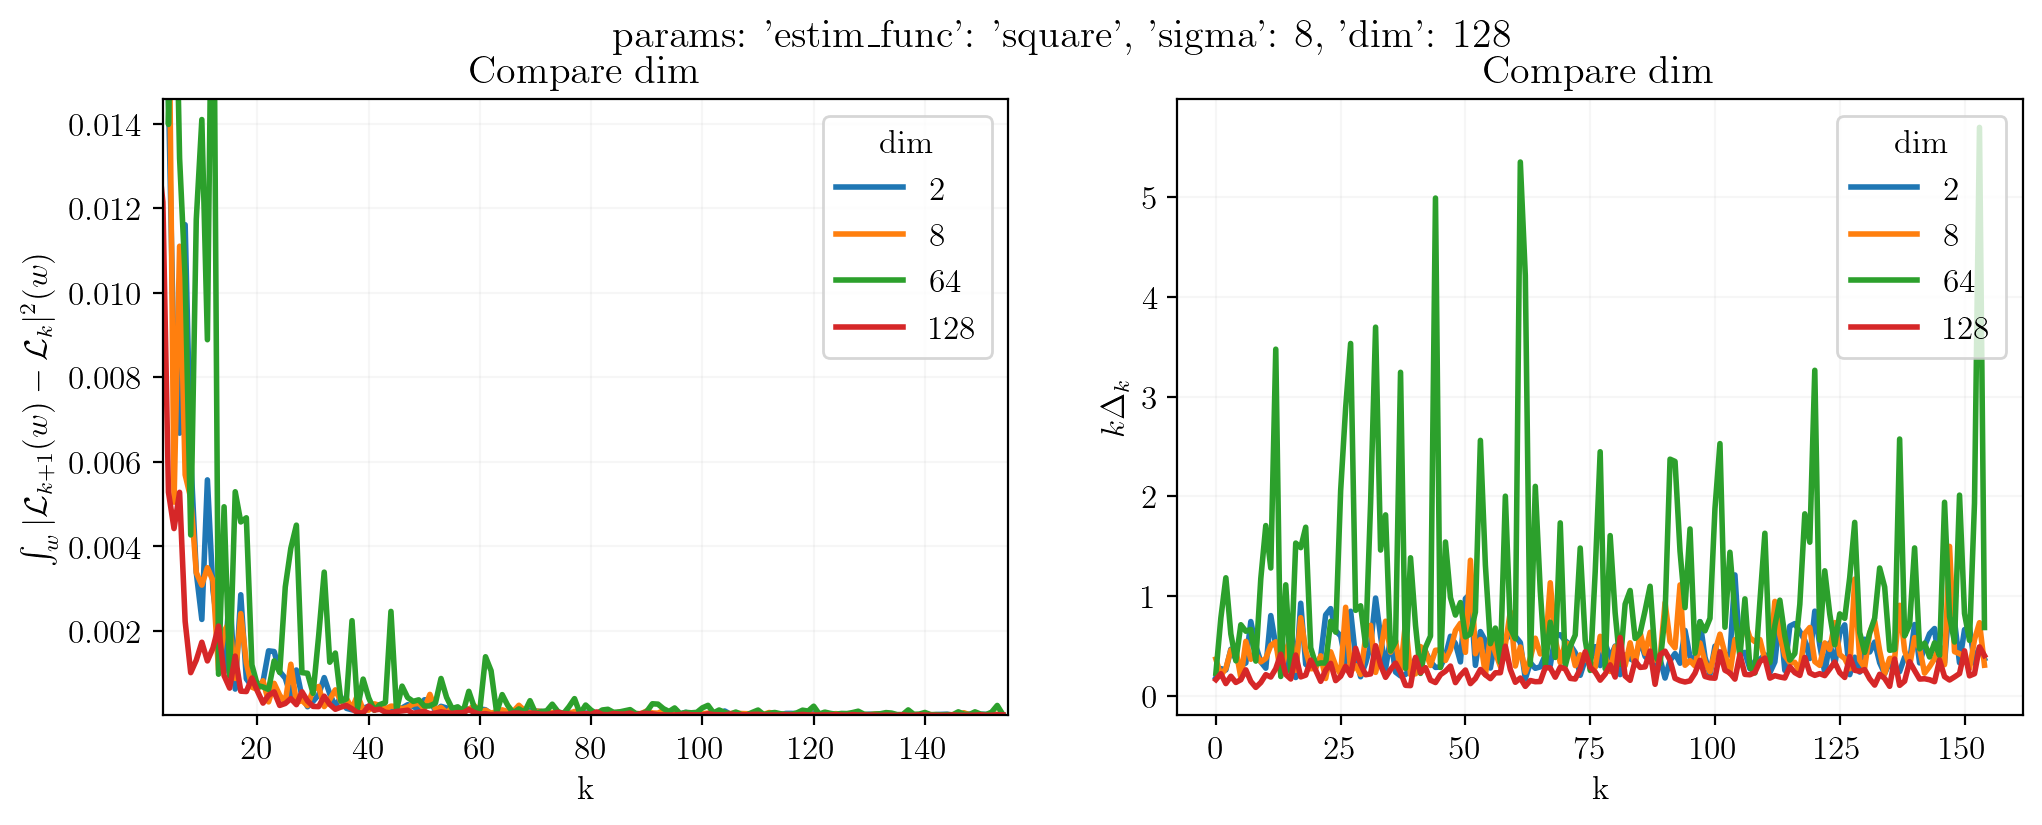

In [19]:
d_vis.compare_params(
    'random-subspace-proj',
    {'estim_func':'square', 'sigma':8},
    'dim',
    [2, 8, 64, 128],
    num_samples=256,
    begin = 3
)